In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [7]:
#source of the dataset: Open Access Series of Imaging studies http://www.oasis-brains.org/#data
#here we are using OASIS-2 dataset
data= pd.read_csv('/USers/..../Downloads/oasis_longitudinal_demographics.csv')
data.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


Summary: This set consists of a longitudinal collection of 150 subjects aged 60 to 96. Each subject was scanned on two or more visits, separated by at least one year for a total of 373 imaging sessions. For each subject, 3 or 4 individual T1-weighted MRI scans obtained in single scan sessions are included. The subjects are all right-handed and include both men and women. 72 of the subjects were characterized as nondemented throughout the study. 64 of the included subjects were characterized as demented at the time of their initial visits and remained so for subsequent scans, including 51 individuals with mild to moderate Alzheimer’s disease. Another 14 subjects were characterized as nondemented at the time of their initial visit and were subsequently characterized as demented at a later visit.

In [8]:
# Data Analysis
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [9]:
# is there any Nan in any variable
data.isna().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [13]:
# replace the NA values in SES and MMSE with their respective means
data['SES'].fillna(value=data['SES'].mean(), inplace= True)
data['MMSE'].fillna(value= data['MMSE'].mean(), inplace=True)
# check for any other NA values
data.isna().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [11]:
# for our coding purpose we will convert sex and group into numerical variables (0 and 1)
data['M/F'] = data['M/F'].apply(lambda x : 0 if x == 'F' else 1) # Male = 1 and Female = 0
data['Group'] = data['Group'].apply( lambda x: 0 if x == 'Nondemented' else 1) # Nondemented = 0 and demented/converted = 1
data.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,0,1,0,1,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,0,2,457,1,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,1,1,0,1,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,1,2,560,1,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,1,3,1895,1,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


Text(0.5, 1.0, 'Plot showing age distribution for both groups of patients')

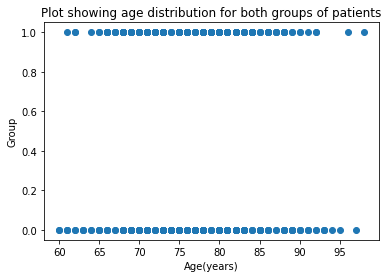

In [30]:
#Data Visualization
plt.scatter(data['Age'], data['Group'])
plt.xlabel('Age(years)')
plt.ylabel('Group')
plt.title("Plot showing age distribution for both groups of patients")

From the above plot we see that the patients for Group = 0 (nondemented) are from various ages (60-96). Whereas the age group of 65-92 shows more datapoints for demented group. Surprisingly we do not see a lot of people >92 years of age in demented category. So, dementia is not prevalent in old age group only.

<AxesSubplot:>

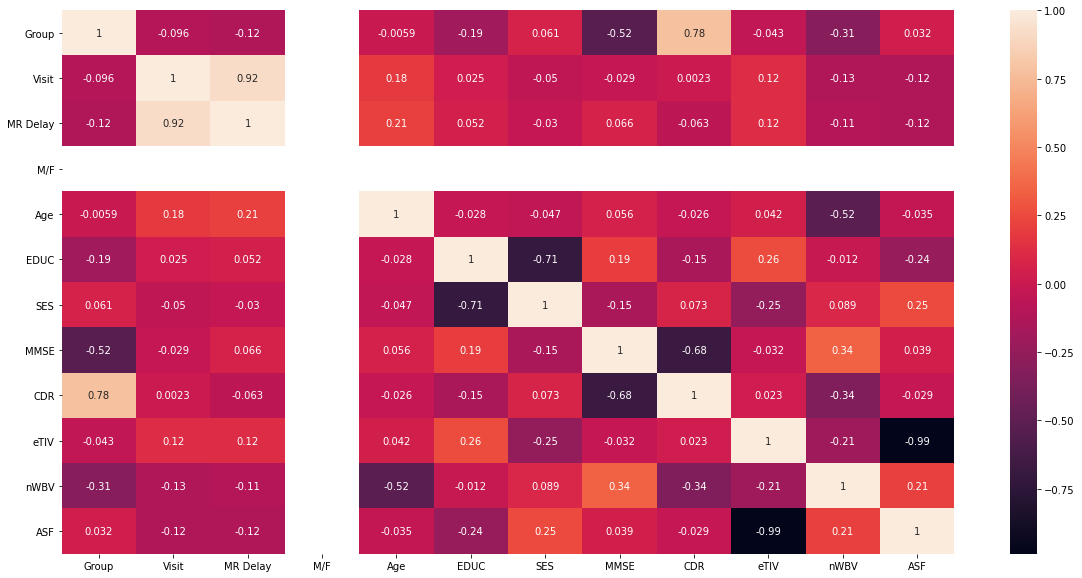

In [35]:
# LEt us see the correlation between various variables
data_cor = data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(data_cor, annot=True)


From the above correlation matrix we see age has no correlation with group, which we already identified in the previous scatterplot. However, the group is highly correlated to CDR (0.78). So we may need to investigate more this variable. 

In [38]:
# Model training and Validation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



In [41]:
X = data[['M/F','Age','EDUC','SES','MMSE','eTIV','nWBV','CDR','ASF']]
y = data['Group']
#splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle= True)
#feature scaling
sc = StandardScaler()
X_trained_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, auc, ConfusionMatrixDisplay

In [61]:
#LogisticRegression
Logistic_model = LogisticRegression().fit(X_trained_scaled, y_train)
y_pred = Logistic_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
recall_LR = recall_score(y_test, y_pred)


print(f'LR test accuracy score {accuracy*100:.2f}%')
print(f'LR recall score is {recall_LR*100:.2f}%')


LR test accuracy score 93.33%
LR recall score is 90.48%


Now we can create a table called confusion matrix to assess where errors are made in the model.
The rows will be the actual classes and columns will be the predictions of our model.

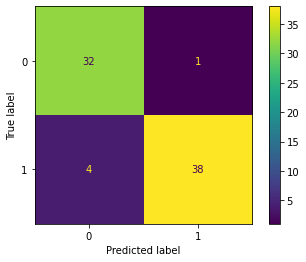

In [53]:
confusion_mat_LR = confusion_matrix(y_test, y_pred)
# display of confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_mat_LR)
cm_display.plot()

Other than accuracy of the model, we can also look at the AUC-ROC curve. AUC is area under the receiver operating characteristic (ROC) curve. ROC curve plots true positive rate vs false positive.

In [56]:
def plot_roc_curve(true_y, y_pred):
    fpr, tpr, thresholds = roc_curve(true_y, y_pred)
    plt.plot(fpr, tpr)
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')

Text(0.5, 1.0, 'LR model ROC curve')

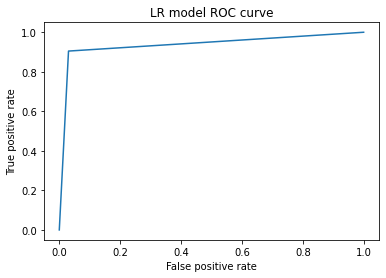

In [58]:
plot_roc_curve(y_test,y_pred)
plt.title('LR model ROC curve')

In [66]:
# for the DecisionTreeClassifier we will implement k-fold
# the training data is split into k number of smaller sets to be used to validate the model.
#the model is trained on k-1 folds of training set and the remaining set is used as a validation set.

from sklearn.model_selection import KFold, cross_val_score

clf = DecisionTreeClassifier(random_state=20)
k_folds = KFold(n_splits=5)
score = cross_val_score(clf, X_trained_scaled, y_train, cv = k_folds)
tree_model = clf.fit(X_trained_scaled,y_train)
y_pred_tr = clf.predict(X_test_scaled)
accu = accuracy_score(y_test, y_pred_tr)
recall_tree = recall_score(y_test, y_pred_tr)

print('Cross validation score: ',score)
print(f'DecisionTree test accuracy score {accu*100:.2f}%')
print(f'DecisionTree recall score is {recall_tree*100:.2f}%')

Cross validation score:  [0.9        0.91666667 0.86666667 0.94915254 0.88135593]
DecisionTree test accuracy score 93.33%
DecisionTree recall score is 92.86%


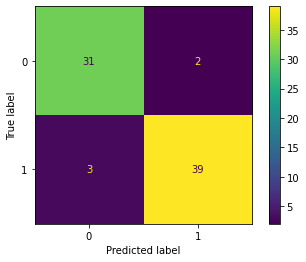

In [55]:
confusion_mat_Tree = confusion_matrix(y_test, y_pred_tr)
# display of confusion matrix
cm_tree_display = ConfusionMatrixDisplay(confusion_mat_Tree)
cm_tree_display.plot()

Text(0.5, 1.0, 'Decision Tree model ROC curve')

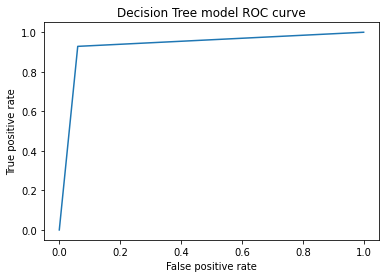

In [59]:
plot_roc_curve(y_test,y_pred_tr)
plt.title('Decision Tree model ROC curve')

In [67]:
# RandomForestClassifier
RF_model =RandomForestClassifier().fit(X_trained_scaled, y_train)
y_pred_RF = RF_model.predict(X_test_scaled)
accu_RF = accuracy_score(y_test, y_pred_RF)
recall_RF = recall_score(y_test, y_pred_RF)


print(f'RandomForestClassifier test accuracy score {accu_RF*100:.2f}%')
print(f'RandomForestClassifier recall score is {recall_RF*100:.2f}%')

RandomForestClassifier test accuracy score 93.33%
RandomForestClassifier recall score is 90.48%


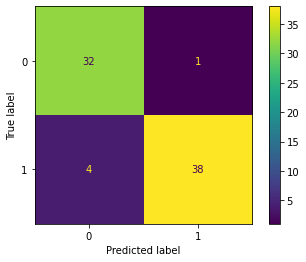

In [68]:
confusion_mat_RF = confusion_matrix(y_test, y_pred_RF)
# display of confusion matrix
cm_RF_display = ConfusionMatrixDisplay(confusion_mat_RF)
cm_RF_display.plot()

Text(0.5, 1.0, 'RandomForest model ROC curve')

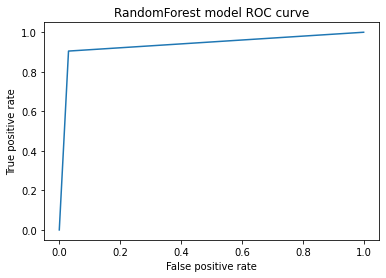

In [69]:
plot_roc_curve(y_test,y_pred_RF)
plt.title('RandomForest model ROC curve')

All three models here show similar accuracy and hence any one of them can be utilized for further study.